In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import statsmodels.formula.api as smf
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


## I'm trying to analyze relationship between Site EUI and CO2 emissions for residential buildings using LL84 2016 datasets

In [173]:
energy_16 = pd.read_excel('http://www.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_data_reported_in_2016.xlsx')
energy_16.rename(columns = {[x for x in energy_16 if 'Site EUI' in x][0]:'Site EUI',
                               'Property Floor Area (Buildngs and Parking)\n(ft2)':'Reported Building Square Footage',
                               [x for x in energy_16 if 'DOF Property Floor Area' in x][0]:'Reported Building Square Footage',
                              'Weather Normalized Source EUI\n(kBtu/ft2)':'Weather Normalized Source EUI',
                               'Zip Code':'Zip','DOF Number of Buildings':'Number of Buildings',
                              'Total GHG Emissions\n(MtCO2e)':'GHG',
                          'Primary Property Type - Self Selected':'Reported Facility Type'},inplace=True)
# select only residential buildings
energy_16 = energy_16[(energy_16['Reported Facility Type'] == 'Residence Hall/Dormitory')|(energy_16['Reported Facility Type'] == 'Multifamily Housing')|
           (energy_16['Reported Facility Type'] == 'Lodging')|(energy_16['Reported Facility Type'] == 'Other - Lodging/Residential')]

In [174]:
data = energy_16[['Direct GHG Emissions (Metric Tons CO2e)','Site EUI']]
data.dropna(axis=0,inplace=True)
data.columns = ['GHG','Site_EUI']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Remove outliers

In [175]:
data.describe()

,GHG,Site_EUI
count,8.751000e+03,8751.000000
mean,1.616727e+03,427.583122
std,6.809589e+04,9618.523581
min,0.000000e+00,0.000000
25%,2.218000e+02,67.800000
50%,3.362000e+02,83.000000
75%,5.328000e+02,101.300000
max,5.852949e+06,801504.700000


(array([  228.,   352.,   761.,  1082.,  1040.,   842.,   661.,   510.,
          424.,   282.]),
 array([  50.8 ,  105.71,  160.62,  215.53,  270.44,  325.35,  380.26,
         435.17,  490.08,  544.99,  599.9 ]),
 <a list of 10 Patch objects>)

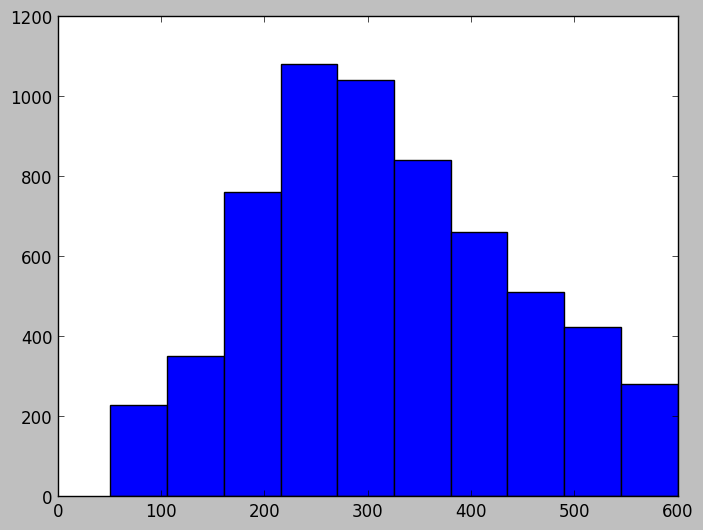

In [176]:
plt.hist(data.GHG[(data.GHG<600)&(data.GHG>50)])

(array([  225.,   347.,   816.,  2531.,  2508.,  1291.,   538.,   244.,
           83.,    51.]),
 array([   0.  ,   19.97,   39.94,   59.91,   79.88,   99.85,  119.82,
         139.79,  159.76,  179.73,  199.7 ]),
 <a list of 10 Patch objects>)

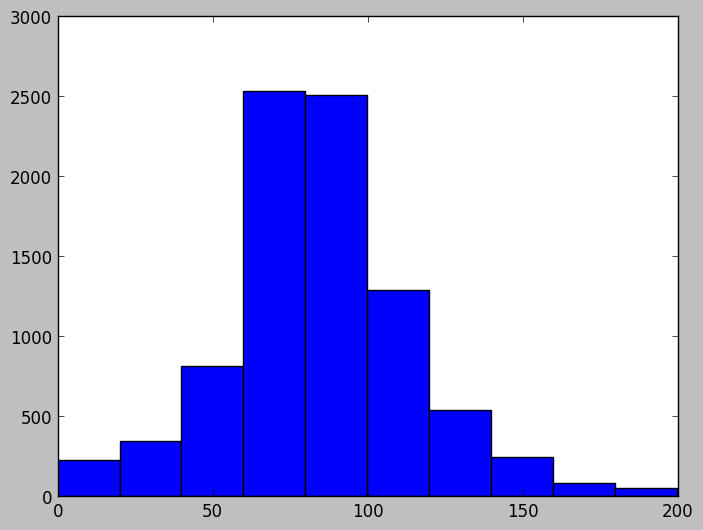

In [177]:
plt.hist(data.Site_EUI[data.Site_EUI<200])

In [178]:
data = data[(data.GHG<600)&(data.GHG>50)&(data.Site_EUI<200)]

In [179]:
data.head()

,GHG,Site_EUI
0,290.2,73.7
1,76.4,51.3
2,145.5,44.9
3,304.6,91.3
15,167.9,76.3


In [180]:
lm = smf.ols('GHG~Site_EUI-1',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 4.636e+04
Date:                Tue, 14 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:09:40   Log-Likelihood:                -38027.
No. Observations:                6153   AIC:                         7.606e+04
Df Residuals:                    6152   BIC:                         7.606e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Site_EUI       3.7174      0.017    215.303      0.000         3.684     3.751
==============================================================================
Omnibus:                      185.671   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.551
Skew:                           0.409   Prob(JB):                     8.53e-46
Kurtosis:                       3.374   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

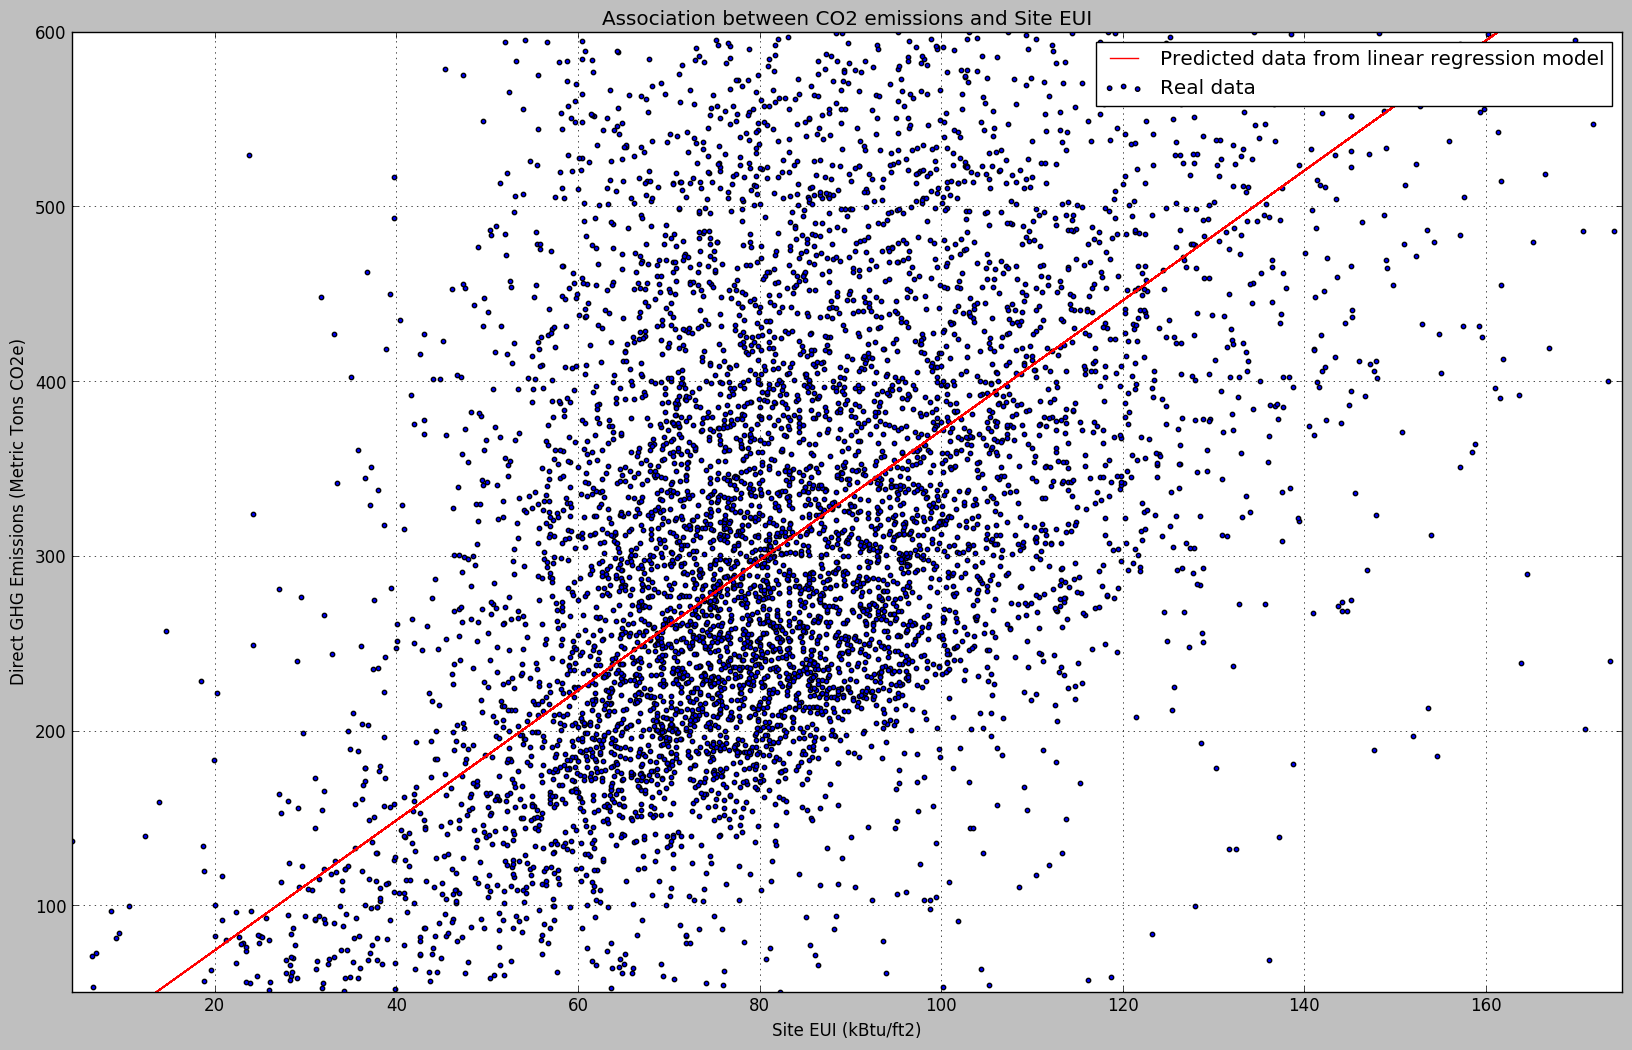

In [193]:
fig = plt.figure(figsize=[20,12])
ax = fig.add_subplot(111)
ax.scatter(data.Site_EUI,data.GHG,s=10,label='Real data')
ax.plot(data.Site_EUI,lm.predict(),'r',linewidth=1,label='Predicted data from linear regression model')
ax.set_xlim(np.min(data.Site_EUI),175)
ax.set_xlabel('Site EUI (kBtu/ft2)')
ax.set_ylabel('Direct GHG Emissions (Metric Tons CO2e)')
ax.set_ylim(np.min(data.GHG),600)
ax.grid()
ax.legend()
ax.set_title('Association between CO2 emissions and Site EUI',y=1)
# save the pic
plt.savefig('plot.png', bbox_inches='tight')